# 02 — Data Exploration (EDA)

Deep exploratory analysis of the master dataset built in notebook 01.  
**Goal:** Understand distributions, correlations, and identify promising signals for predicting next-day TSLA direction.

In [33]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from src.helpers import DATA_PROCESSED, FIGURES, missing_report

sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (14, 5)

import sqlite3, json

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv(DATA_PROCESSED / 'master_dataset.csv', index_col='Date', parse_dates=True)
print(f"Shape: {df.shape}")
print(f"Date range: {df.index.min()} → {df.index.max()}")
df.head()

Shape: (3935, 52)
Date range: 2010-06-29 00:00:00 → 2026-02-19 00:00:00


,Open,High,Low,Close,Volume,target,SMA_5,SMA_10,SMA_20,SMA_50,...,gtrend_product_tesla_fsd,gtrend_product_tesla_robotaxi,gtrend_product_cybertruck_delivery,gtrend_product_tesla_model_2,quarterly_revenue,eps_diluted,net_income,revenue_growth_qoq,eps_growth_qoq,profit_margin
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,1.399867,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Missing Values

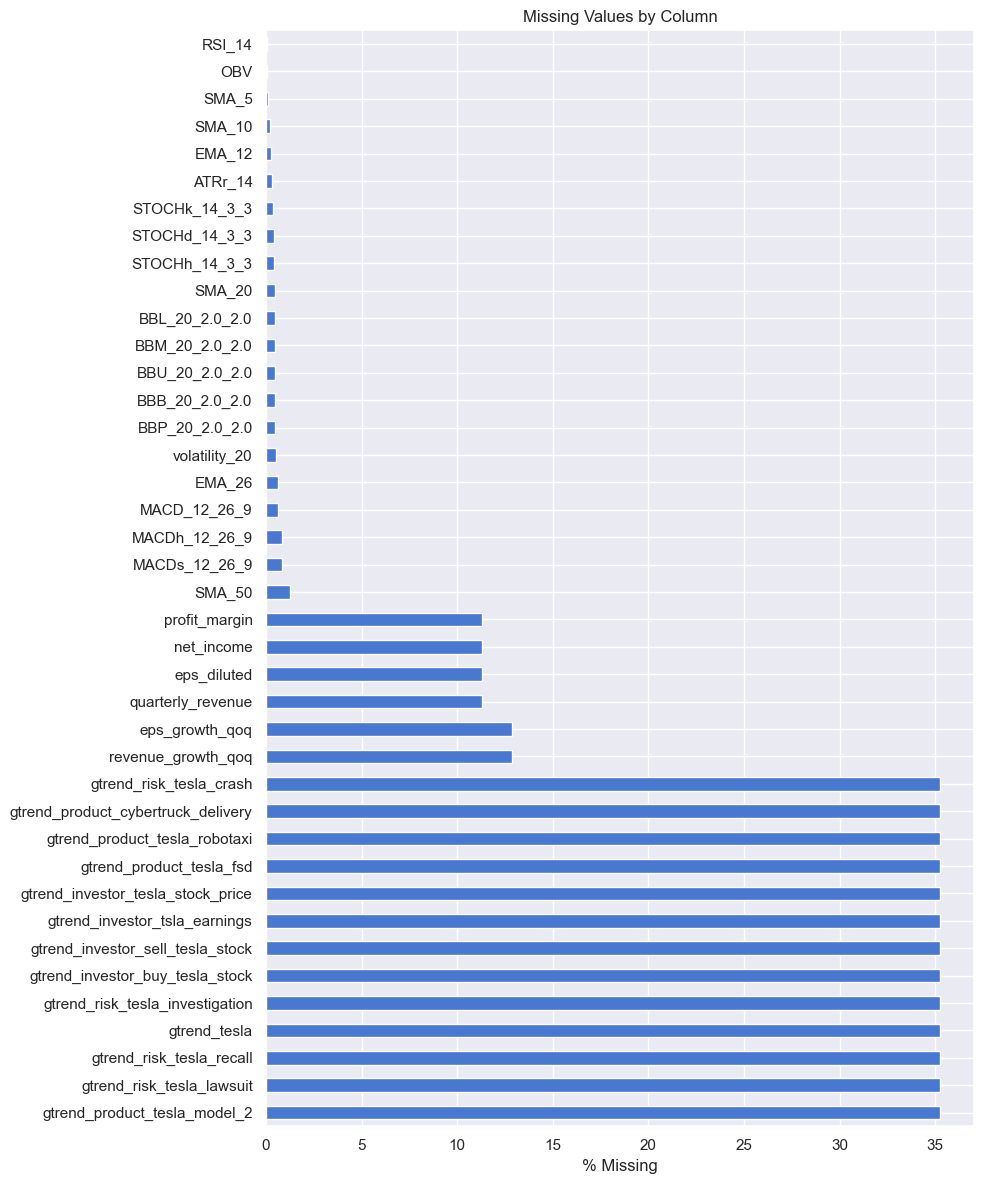

,missing,pct
gtrend_product_tesla_model_2,1388,35.27
gtrend_risk_tesla_lawsuit,1388,35.27
gtrend_risk_tesla_recall,1388,35.27
gtrend_tesla,1388,35.27
gtrend_risk_tesla_investigation,1388,35.27
gtrend_investor_buy_tesla_stock,1388,35.27
gtrend_investor_sell_tesla_stock,1388,35.27
gtrend_investor_tsla_earnings,1388,35.27
gtrend_investor_tesla_stock_price,1388,35.27
gtrend_product_tesla_fsd,1388,35.27


In [35]:
mr = missing_report(df)
if not mr.empty:
    fig, ax = plt.subplots(figsize=(10, max(4, len(mr)*0.3)))
    mr['pct'].plot.barh(ax=ax)
    ax.set_xlabel('% Missing')
    ax.set_title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values!")
mr

## 2. TSLA Price & Volume Overview

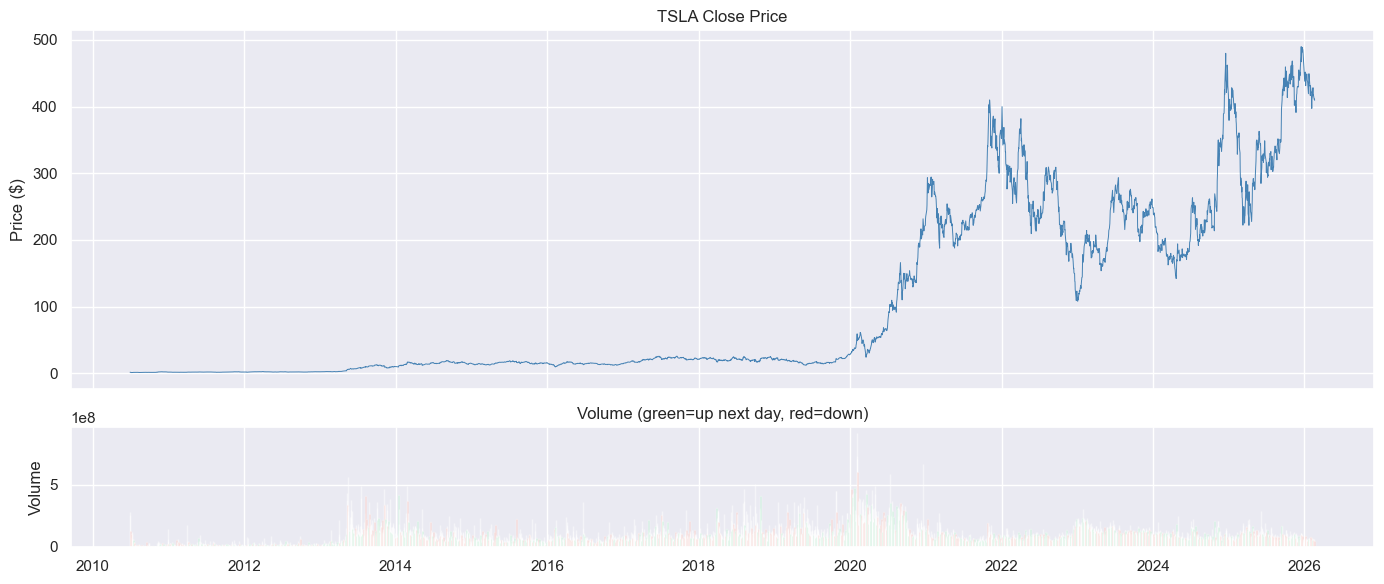

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharex=True,
                         gridspec_kw={'height_ratios': [3, 1]})

axes[0].plot(df.index, df['Close'], lw=0.7, color='steelblue')
axes[0].set_title('TSLA Close Price')
axes[0].set_ylabel('Price ($)')

colors = ['#2ecc71' if t == 1 else '#e74c3c' for t in df['target']]
axes[1].bar(df.index, df['Volume'], width=1, color=colors, alpha=0.5)
axes[1].set_title('Volume (green=up next day, red=down)')
axes[1].set_ylabel('Volume')

plt.tight_layout()
plt.show()

## 3. Target Distribution

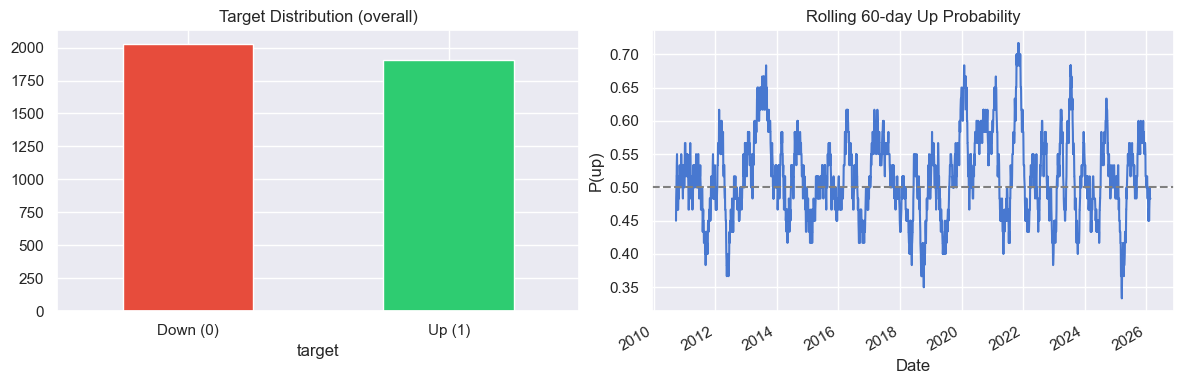

Overall: 0.516 up days


In [37]:
# Drop the last row (target is NaN because there's no "next day")
df_valid = df.dropna(subset=['target'])
df_valid['target'] = df_valid['target'].astype(int)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_valid['target'].value_counts().plot.bar(ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Target Distribution (overall)')
axes[0].set_xticklabels(['Down (0)', 'Up (1)'], rotation=0)

# Rolling 60-day up-ratio
df_valid['target'].rolling(60).mean().plot(ax=axes[1])
axes[1].axhline(0.5, ls='--', color='gray')
axes[1].set_title('Rolling 60-day Up Probability')
axes[1].set_ylabel('P(up)')

plt.tight_layout()
plt.show()

print(f"Overall: {df_valid['target'].mean():.3f} up days")

## 4. Returns Distribution

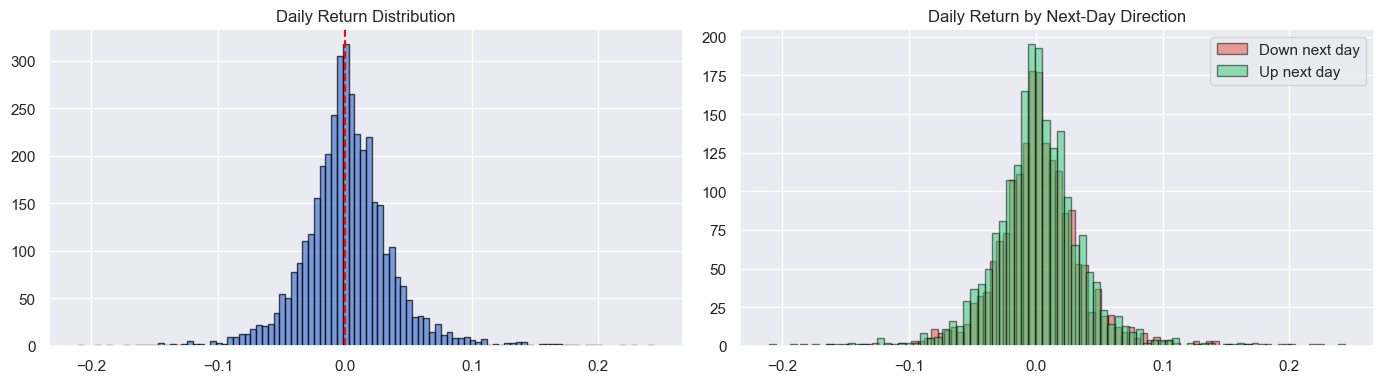

count    3934.000000
mean        0.002066
std         0.036307
min        -0.210628
25%        -0.016529
50%         0.001179
75%         0.019579
max         0.243951
Name: daily_return, dtype: float64


In [39]:
df_valid['daily_return'] = df_valid['Close'].pct_change()

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

df_valid['daily_return'].hist(bins=100, ax=axes[0], edgecolor='black', alpha=0.7)
axes[0].set_title('Daily Return Distribution')
axes[0].axvline(0, color='red', ls='--')

# QQ-style: returns by target class
for t, label, color in [(0, 'Down next day', '#e74c3c'), (1, 'Up next day', '#2ecc71')]:
    df_valid.loc[df_valid['target'] == t, 'daily_return'].hist(
        bins=80, ax=axes[1], alpha=0.5, label=label, color=color, edgecolor='black')
axes[1].set_title('Daily Return by Next-Day Direction')
axes[1].legend()

plt.tight_layout()
plt.show()

print(df_valid['daily_return'].describe())

## 5. Technical Indicators vs Target

In [40]:
ta_cols = [c for c in df_valid.columns if any(
    c.startswith(p) for p in ['SMA', 'EMA', 'RSI', 'MACD', 'BBL', 'BBM', 'BBU',
                              'ATR', 'STOCHk', 'STOCHd', 'OBV', 'volatility'])]
print(f"Technical indicator columns: {ta_cols}")

Technical indicator columns: ['SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_20_2.0_2.0', 'BBM_20_2.0_2.0', 'BBU_20_2.0_2.0', 'ATRr_14', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'OBV', 'volatility_20']


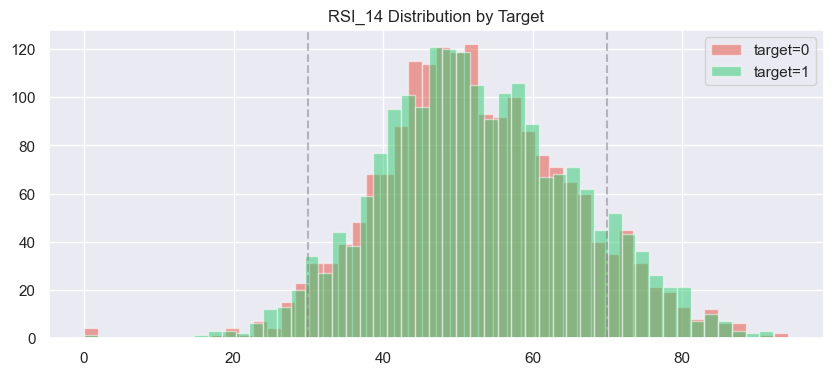

In [41]:
# RSI distribution by target
rsi_col = [c for c in df_valid.columns if 'RSI' in c]
if rsi_col:
    fig, ax = plt.subplots(figsize=(10, 4))
    for t, color in [(0, '#e74c3c'), (1, '#2ecc71')]:
        df_valid.loc[df_valid['target'] == t, rsi_col[0]].hist(
            bins=50, alpha=0.5, color=color, label=f'target={t}', ax=ax)
    ax.set_title(f'{rsi_col[0]} Distribution by Target')
    ax.legend()
    ax.axvline(30, ls='--', color='gray', alpha=0.5)
    ax.axvline(70, ls='--', color='gray', alpha=0.5)
    plt.show()

In [42]:
# Mean of each indicator grouped by target
if ta_cols:
    means = df_valid.groupby('target')[ta_cols].mean().T
    means.columns = ['Down', 'Up']
    means['diff_pct'] = ((means['Up'] - means['Down']) / means['Down'].abs().clip(lower=1e-6) * 100).round(2)
    means.sort_values('diff_pct', ascending=False)

## 6. Tweet Word Score Analysis

Elon's tweets are scored using **log-odds differential words** derived from a statistical analysis of which words best predict next-day TSLA direction.  
Instead of generic VADER sentiment, we use statistically significant words identified by comparing word frequencies on bullish vs bearish days:
- **Bullish words** (calm/intellectual: "feel", "often", "details") → P(Up) ≈ 0.80
- **Bearish words** (political/crisis: "government", "fired", "dei") → P(Up) ≈ 0.42
- **tweet_word_score** = daily bullish word count − bearish word count across ALL original tweets

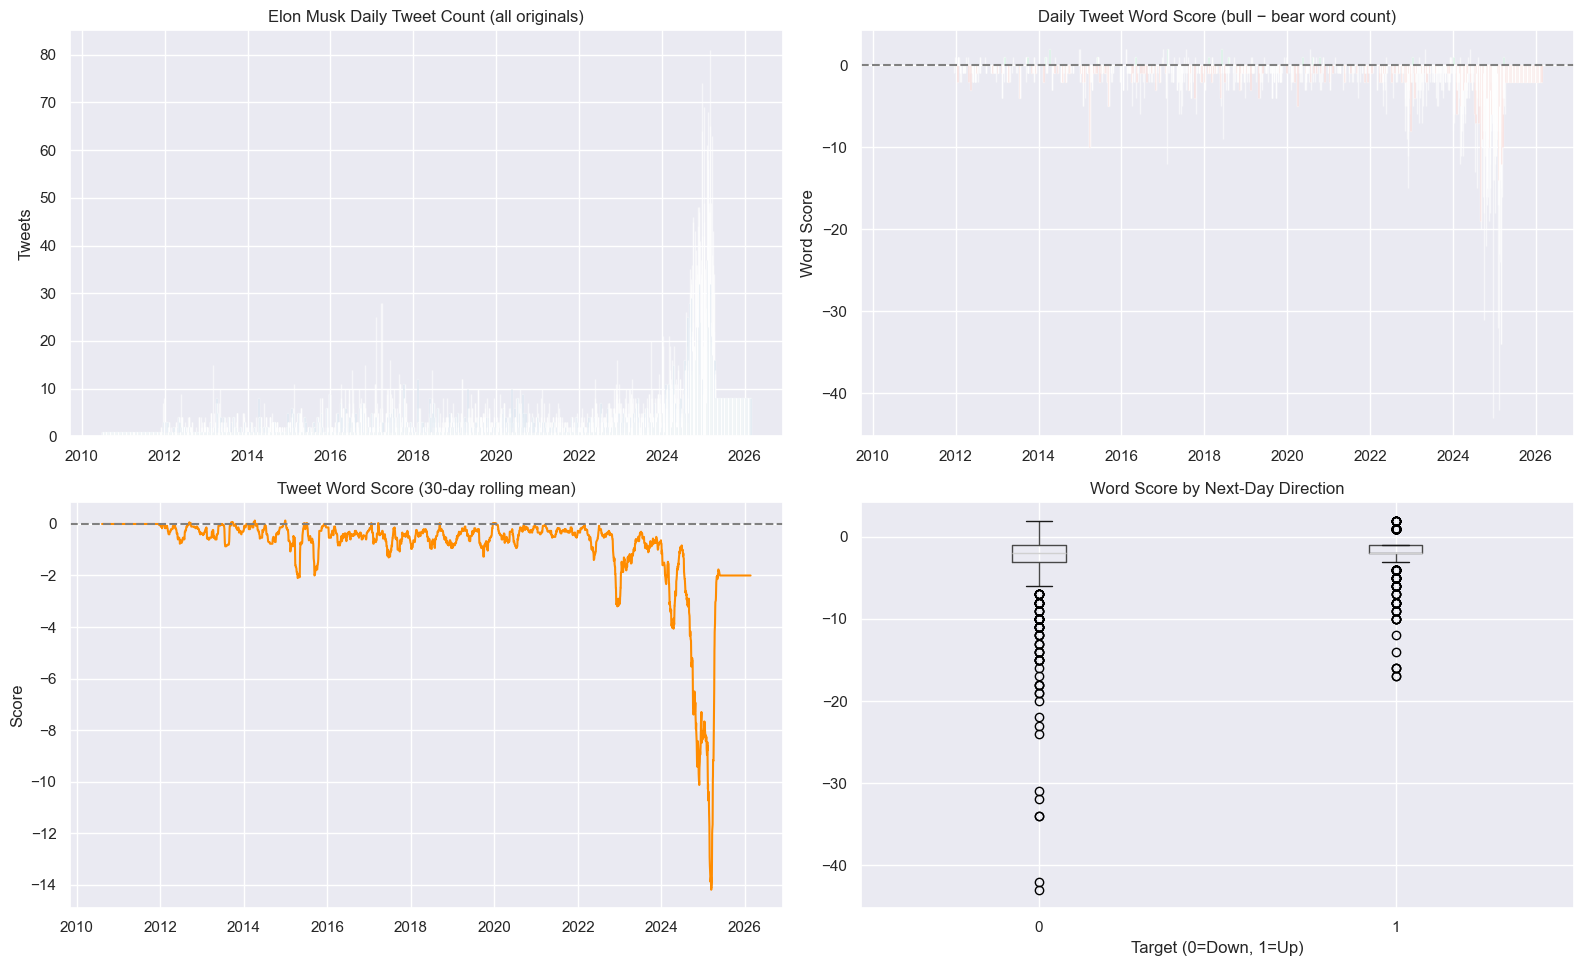

Days with tweets: 3935
Days with non-zero word score: 1449
P(Up | positive score) = 0.639
P(Up | negative score) = 0.465
P(Up | baseline)       = 0.516


In [43]:
if 'tweet_count' in df_valid.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Top-left: daily tweet count
    axes[0, 0].bar(df_valid.index, df_valid['tweet_count'], width=1, alpha=0.6, color='steelblue')
    axes[0, 0].set_title('Elon Musk Daily Tweet Count (all originals)')
    axes[0, 0].set_ylabel('Tweets')

    # Top-right: word score over time
    if 'tweet_word_score' in df_valid.columns:
        score = df_valid['tweet_word_score']
        colors = ['#2ecc71' if v > 0 else '#e74c3c' if v < 0 else '#95a5a6' for v in score]
        axes[0, 1].bar(df_valid.index, score, width=1, alpha=0.6, color=colors)
        axes[0, 1].axhline(0, ls='--', color='gray')
        axes[0, 1].set_title('Daily Tweet Word Score (bull − bear word count)')
        axes[0, 1].set_ylabel('Word Score')

        # Bottom-left: rolling 30-day average word score
        axes[1, 0].plot(df_valid.index, score.rolling(30).mean(), color='darkorange', linewidth=1.5)
        axes[1, 0].axhline(0, ls='--', color='gray')
        axes[1, 0].set_title('Tweet Word Score (30-day rolling mean)')
        axes[1, 0].set_ylabel('Score')

        # Bottom-right: word score by target
        df_scored = df_valid[df_valid['tweet_word_score'] != 0].copy()
        if len(df_scored) > 0:
            df_scored.boxplot(column='tweet_word_score', by='target', ax=axes[1, 1])
            axes[1, 1].set_title('Word Score by Next-Day Direction')
            axes[1, 1].set_xlabel('Target (0=Down, 1=Up)')
            plt.suptitle('')
        else:
            axes[1, 1].text(0.5, 0.5, 'No scored days', ha='center', va='center')
            axes[1, 1].set_title('Word Score by Next-Day Direction')
    else:
        for ax in [axes[0, 1], axes[1, 0], axes[1, 1]]:
            ax.text(0.5, 0.5, 'No word score data', ha='center', va='center')

    plt.tight_layout()
    plt.show()

    # Summary stats
    if 'tweet_word_score' in df_valid.columns:
        scored = df_valid[df_valid['tweet_word_score'] != 0]
        print(f"Days with tweets: {(df_valid['tweet_count'] > 0).sum()}")
        print(f"Days with non-zero word score: {len(scored)}")
        if len(scored) > 0:
            print(f"P(Up | positive score) = {scored.loc[scored['tweet_word_score'] > 0, 'target'].mean():.3f}")
            print(f"P(Up | negative score) = {scored.loc[scored['tweet_word_score'] < 0, 'target'].mean():.3f}")
            print(f"P(Up | baseline)       = {df_valid['target'].mean():.3f}")
else:
    print("No tweet data available — skipping.")

## 7. Google Trends (Categorized Signals)

Weekly search interest across categorized Tesla-related terms:
- **Risk** signals: recall, crash, lawsuit, investigation
- **Investor** signals: buy/sell stock, earnings, stock price
- **Product** signals: FSD, robotaxi, cybertruck delivery, model 2
- **Brand** baseline: Tesla (overall awareness)

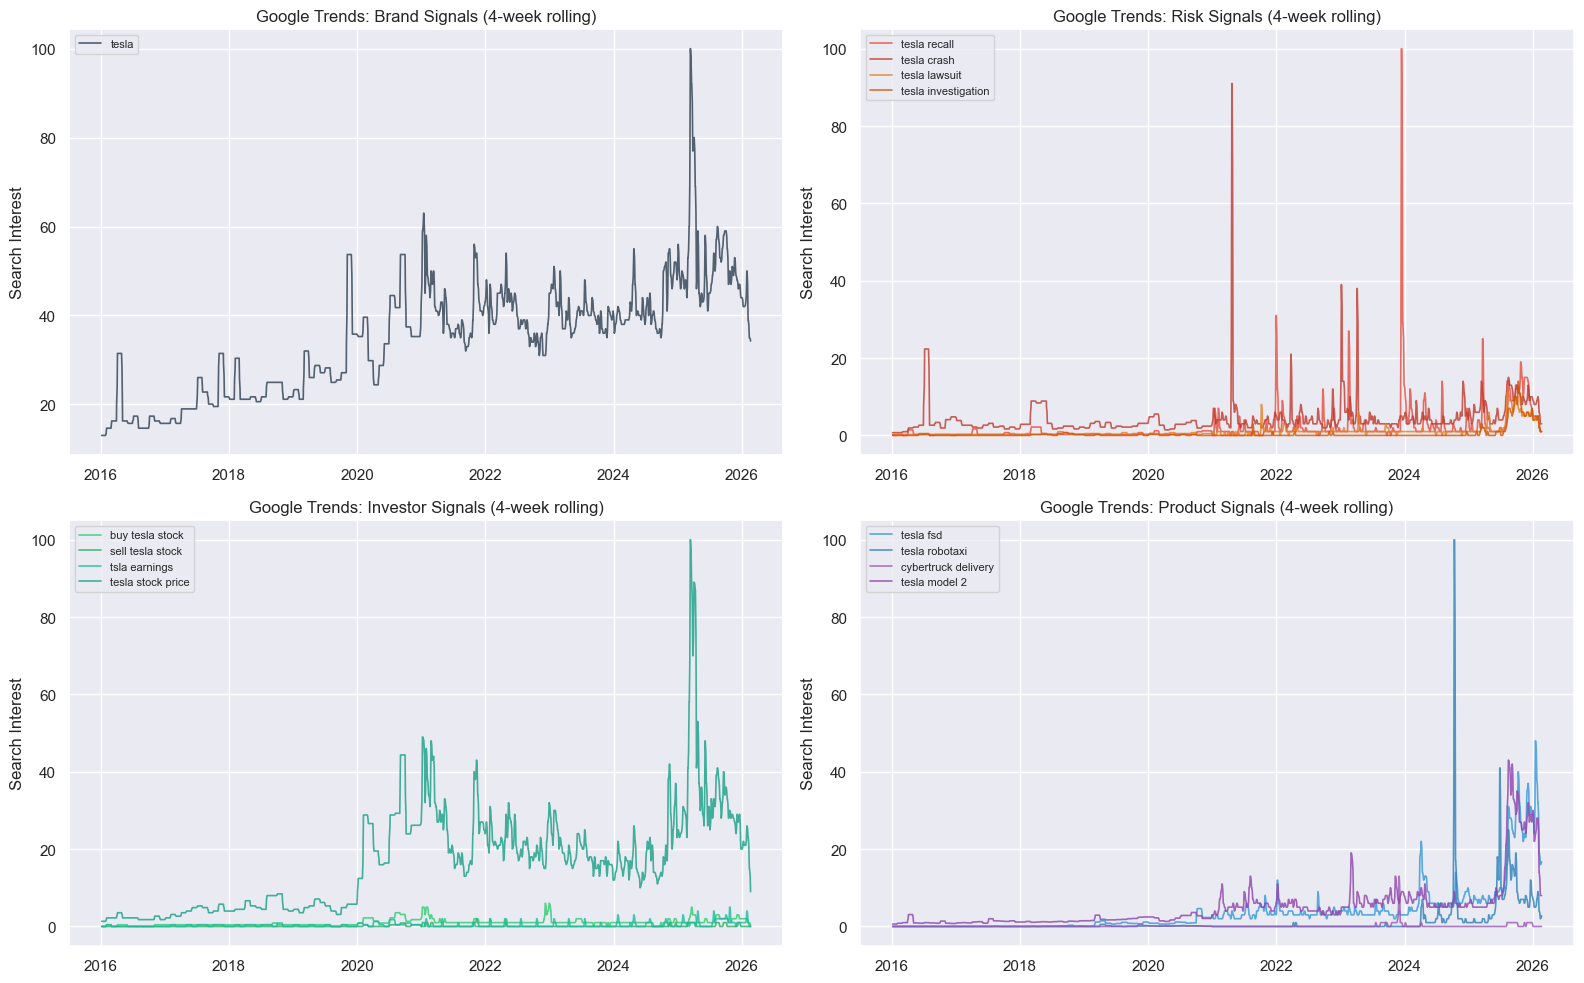

Google Trends correlation with target (next-day direction):
  gtrend_product_tesla_robotaxi                 -0.0148
  gtrend_product_tesla_fsd                      -0.0124
  gtrend_product_cybertruck_delivery            -0.0116
  gtrend_risk_tesla_recall                      -0.0102
  gtrend_product_tesla_model_2                  +0.0006
  gtrend_risk_tesla_investigation               +0.0020
  gtrend_risk_tesla_lawsuit                     +0.0089
  gtrend_risk_tesla_crash                       +0.0104
  gtrend_investor_sell_tesla_stock              +0.0107
  gtrend_investor_tesla_stock_price             +0.0169
  gtrend_tesla                                  +0.0175
  gtrend_investor_buy_tesla_stock               +0.0184
  gtrend_investor_tsla_earnings                 +0.0222


In [45]:
gt_cols = [c for c in df_valid.columns if c.startswith('gtrend_')]
if gt_cols:
    # Group columns by category
    categories = {}
    for c in gt_cols:
        name = c.replace('gtrend_', '')
        if name == 'tesla':
            cat = 'brand'
        elif name.startswith('risk_'):
            cat = 'risk'
        elif name.startswith('investor_'):
            cat = 'investor'
        elif name.startswith('product_'):
            cat = 'product'
        else:
            cat = 'other'
        categories.setdefault(cat, []).append(c)

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    cat_colors = {
        'brand': ['#2c3e50'],
        'risk': ['#e74c3c', '#c0392b', '#e67e22', '#d35400'],
        'investor': ['#2ecc71', '#27ae60', '#1abc9c', '#16a085'],
        'product': ['#3498db', '#2980b9', '#9b59b6', '#8e44ad'],
    }

    for ax, (cat, cols) in zip(axes.flatten(), categories.items()):
        colors = cat_colors.get(cat, ['steelblue'] * len(cols))
        for i, c in enumerate(cols):
            label = c.replace('gtrend_', '').replace(f'{cat}_', '').replace('_', ' ')
            color = colors[i % len(colors)]
            # Use rolling mean to smooth weekly noise
            ax.plot(df_valid.index, df_valid[c].rolling(4).mean(),
                    label=label, alpha=0.8, linewidth=1.2, color=color)
        ax.set_title(f'Google Trends: {cat.title()} Signals (4-week rolling)')
        ax.legend(fontsize=8, loc='upper left')
        ax.set_ylabel('Search Interest')

    plt.tight_layout()
    plt.show()

    # Correlation with target
    print("Google Trends correlation with target (next-day direction):")
    gt_corr = df_valid[gt_cols + ['target']].corr()['target'].drop('target').sort_values()
    for c, v in gt_corr.items():
        print(f"  {c:45s} {v:+.4f}")
else:
    print("No Google Trends data available — skipping.")

## 8. Correlation Analysis

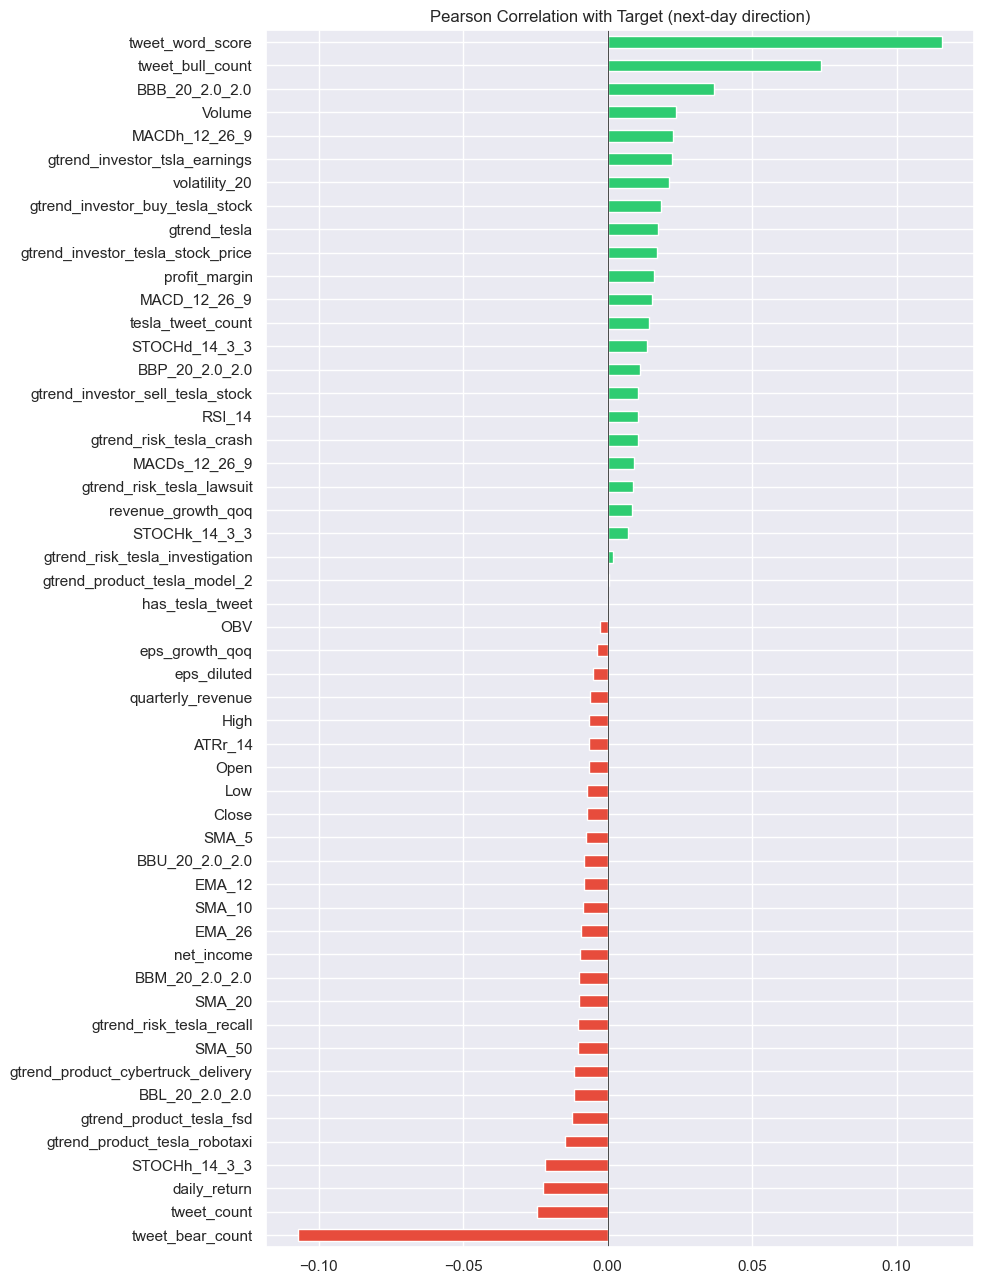


Top 10 positive correlations:
gtrend_investor_tesla_stock_price    0.016950
gtrend_tesla                         0.017464
gtrend_investor_buy_tesla_stock      0.018446
volatility_20                        0.021334
gtrend_investor_tsla_earnings        0.022210
MACDh_12_26_9                        0.022751
Volume                               0.023635
BBB_20_2.0_2.0                       0.036801
tweet_bull_count                     0.073713
tweet_word_score                     0.115662
Name: target, dtype: float64

Top 10 negative correlations:
tweet_bear_count                     -0.107074
tweet_count                          -0.024452
daily_return                         -0.022272
STOCHh_14_3_3                        -0.021620
gtrend_product_tesla_robotaxi        -0.014838
gtrend_product_tesla_fsd             -0.012409
BBL_20_2.0_2.0                       -0.011770
gtrend_product_cybertruck_delivery   -0.011623
SMA_50                               -0.010308
gtrend_risk_tesla_recall  

In [46]:
# Correlation of all numeric features with the target
numeric_cols = df_valid.select_dtypes(include=[np.number]).columns.tolist()
corr_target = df_valid[numeric_cols].corr()['target'].drop('target').sort_values()

fig, ax = plt.subplots(figsize=(10, max(6, len(corr_target)*0.25)))
colors = ['#2ecc71' if v > 0 else '#e74c3c' for v in corr_target]
corr_target.plot.barh(ax=ax, color=colors)
ax.set_title('Pearson Correlation with Target (next-day direction)')
ax.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nTop 10 positive correlations:")
print(corr_target.tail(10))
print("\nTop 10 negative correlations:")
print(corr_target.head(10))

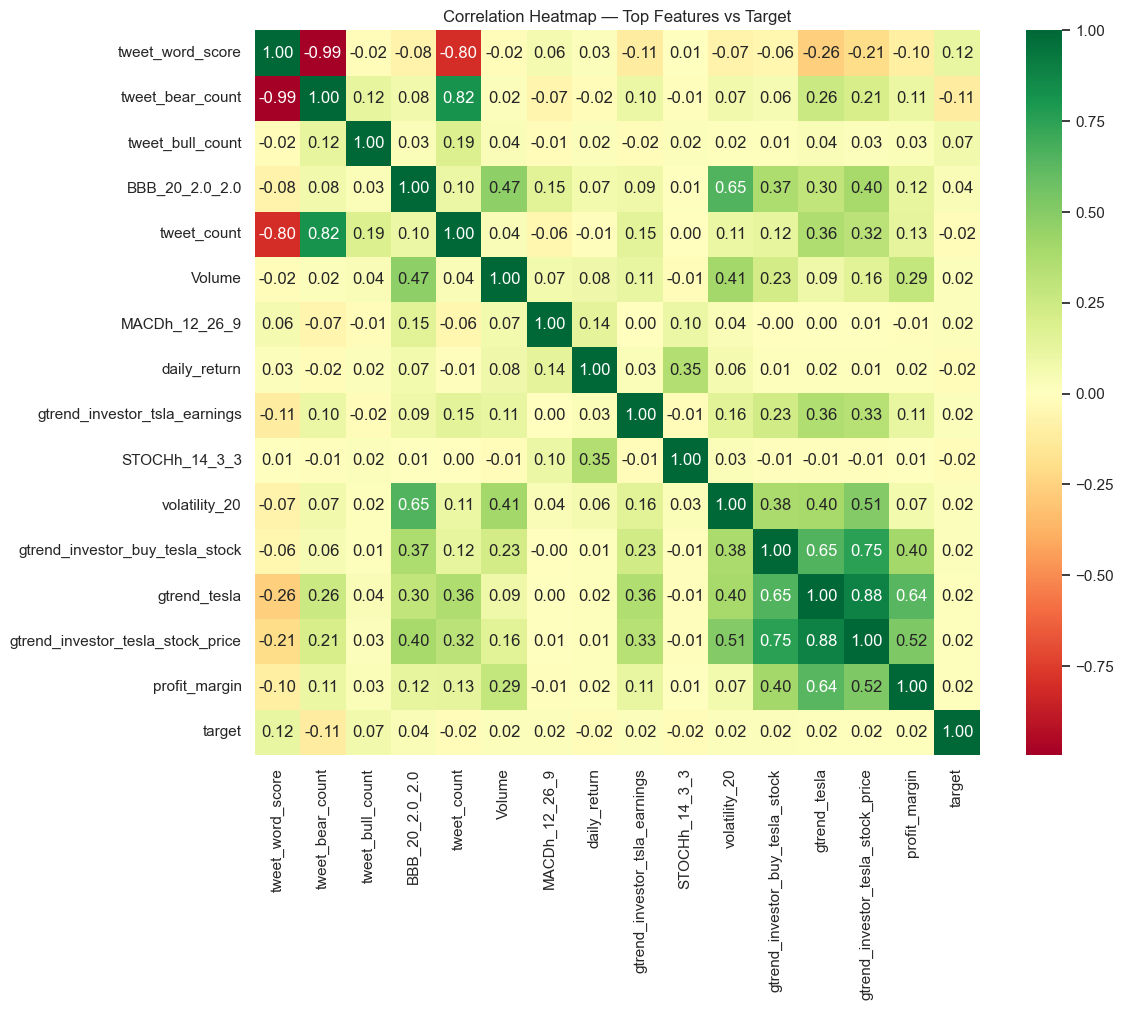

In [47]:
# Heatmap of top correlated features
top_feats = corr_target.abs().nlargest(15).index.tolist() + ['target']

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_valid[top_feats].corr(), annot=True, fmt='.2f',
            cmap='RdYlGn', center=0, ax=ax, square=True)
ax.set_title('Correlation Heatmap — Top Features vs Target')
plt.tight_layout()
plt.show()

## 9. Feature Distributions (selected)

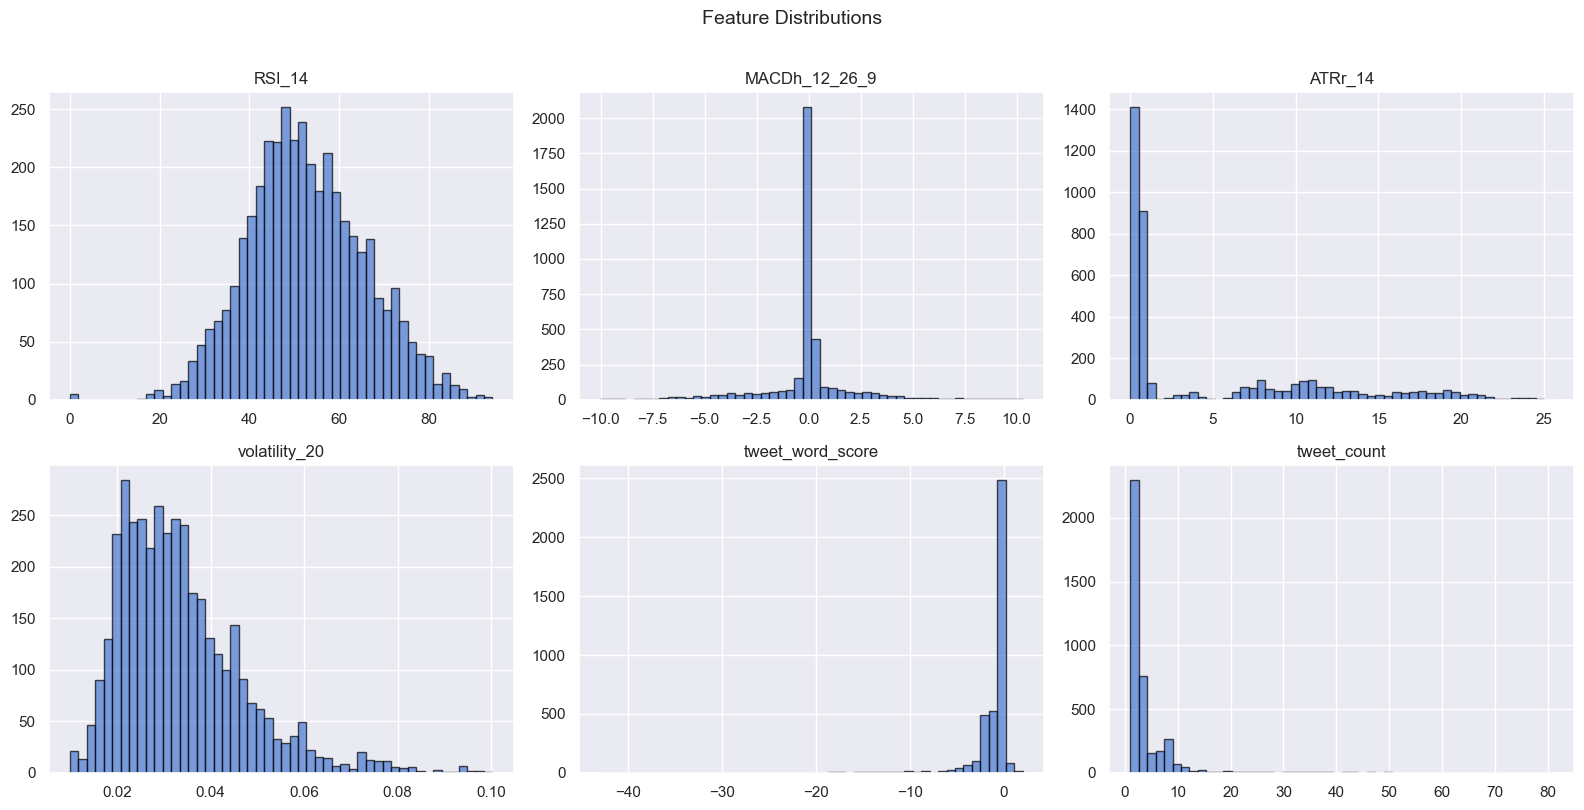

In [48]:
plot_cols = [c for c in ['RSI_14', 'MACDh_12_26_9', 'ATRr_14', 'volatility_20',
                          'tweet_word_score', 'tweet_count'] if c in df_valid.columns]

if plot_cols:
    n = len(plot_cols)
    fig, axes = plt.subplots(2, (n+1)//2, figsize=(16, 8))
    axes = axes.flatten()
    for i, col in enumerate(plot_cols):
        df_valid[col].hist(bins=50, ax=axes[i], edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    plt.suptitle('Feature Distributions', y=1.01, fontsize=14)
    plt.tight_layout()
    plt.show()

## 10. SEC Filing Signal Analysis

Tesla files 8-K (material events), 10-K (annual reports), and DEF 14A (proxy statements) with the SEC.  
Each filing was preprocessed into sections and classified by a local LLM (Qwen 2.5 7B) for **sentiment**, **magnitude**, **direction**, **confidence**, and **topic**.  
Let's explore the 233 classified sections from 198 filings (2016–2026).

In [49]:
from src.helpers import DATA_RAW

# Daily signals CSV (one row per filing-section classification)
sec = pd.read_csv(DATA_RAW / 'sec_daily_signals.csv', parse_dates=['date'])

# Preprocessed packets (sentence-level features)
with open(DATA_RAW / 'sec_preprocessed_packets.json') as f:
    packets = json.load(f)
packets_df = pd.DataFrame(packets)

# SQLite for filing metadata
conn = sqlite3.connect(DATA_RAW / 'sec_filings.db')
filings_db = pd.read_sql('SELECT * FROM filings', conn)
filings_db['filing_date'] = pd.to_datetime(filings_db['filing_date'])
conn.close()

print(f"Signals: {sec.shape[0]} classified sections  |  Packets: {len(packets)}  |  Filings: {len(filings_db)}")
print(f"Date range: {sec['date'].min().date()} to {sec['date'].max().date()}")
print(f"\nForm types: {dict(filings_db['form_type'].value_counts())}")

Signals: 233 classified sections  |  Packets: 246  |  Filings: 198
Date range: 2016-01-04 to 2026-01-29

Form types: {'8-K': np.int64(176), '10-K': np.int64(11), 'DEF 14A': np.int64(11)}


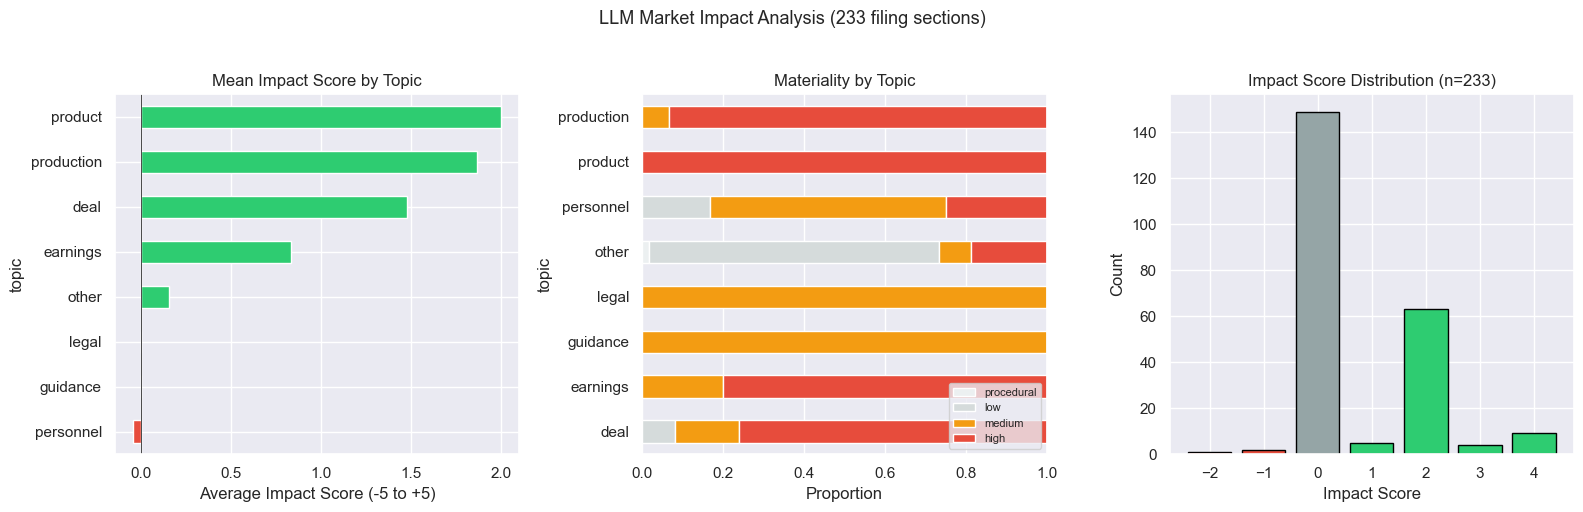

Score stats: mean=0.75, negative=3, zero=149, positive=81


In [50]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Impact score distribution by topic
topic_scores = sec.groupby('topic')['impact_score'].mean().sort_values()
topic_scores.plot.barh(ax=axes[0], color=['#e74c3c' if v < 0 else '#2ecc71' if v > 0 else '#95a5a6' for v in topic_scores])
axes[0].set_title('Mean Impact Score by Topic')
axes[0].set_xlabel('Average Impact Score (-5 to +5)')
axes[0].axvline(0, color='black', linewidth=0.5)

# Materiality distribution by topic
mat_order = ['procedural', 'low', 'medium', 'high']
ct2 = pd.crosstab(sec['topic'], sec['materiality'], normalize='index')
ct2 = ct2.reindex(columns=[c for c in mat_order if c in ct2.columns])
ct2.plot.barh(stacked=True, ax=axes[1], color=['#ecf0f1', '#d5dbdb', '#f39c12', '#e74c3c'])
axes[1].set_title('Materiality by Topic')
axes[1].set_xlabel('Proportion')
axes[1].legend(loc='lower right', fontsize=8)

# Impact score histogram with per-bar colors via bar chart
score_counts = sec['impact_score'].value_counts().sort_index()
bar_colors = ['#e74c3c' if s < 0 else '#95a5a6' if s == 0 else '#2ecc71' for s in score_counts.index]
axes[2].bar(score_counts.index, score_counts.values, color=bar_colors, edgecolor='black', width=0.8)
axes[2].set_title(f'Impact Score Distribution (n={len(sec)})')
axes[2].set_xlabel('Impact Score')
axes[2].set_ylabel('Count')
axes[2].set_xticks(range(int(sec['impact_score'].min()), int(sec['impact_score'].max()) + 1))

plt.suptitle(f'LLM Market Impact Analysis ({len(sec)} filing sections)', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

print(f"Score stats: mean={sec['impact_score'].mean():.2f}, "
      f"negative={len(sec[sec['impact_score']<0])}, "
      f"zero={len(sec[sec['impact_score']==0])}, "
      f"positive={len(sec[sec['impact_score']>0])}")

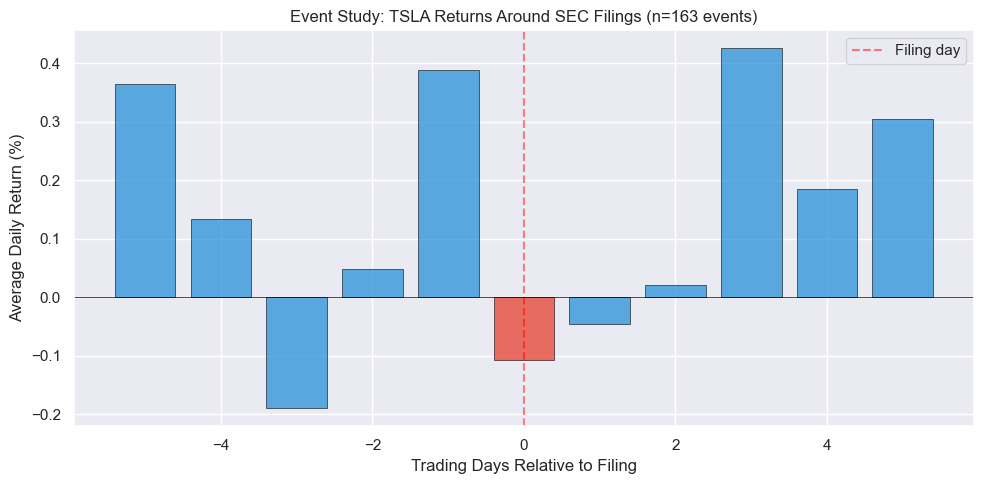

In [51]:
# Event study: average TSLA returns around SEC filing dates
df_prices = df.dropna(subset=['target']).copy()
df_prices['daily_return'] = df_prices['Close'].pct_change()

filing_dates_unique = sec['date'].dt.normalize().unique()
window = 5
results = []
for fd in filing_dates_unique:
    loc = df_prices.index.get_indexer([fd], method='nearest')[0]
    if loc < window or loc >= len(df_prices) - window:
        continue
    chunk = df_prices.iloc[loc - window : loc + window + 1]['daily_return'].values
    results.append(chunk)

avg_returns = np.array(results).mean(axis=0)
days = list(range(-window, window + 1))

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#3498db' if d != 0 else '#e74c3c' for d in days]
ax.bar(days, avg_returns * 100, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
ax.axvline(0, ls='--', color='red', alpha=0.5, label='Filing day')
ax.axhline(0, color='black', linewidth=0.5)
ax.set_xlabel('Trading Days Relative to Filing')
ax.set_ylabel('Average Daily Return (%)')
ax.set_title(f'Event Study: TSLA Returns Around SEC Filings (n={len(results)} events)')
ax.legend()
plt.tight_layout()
plt.show()

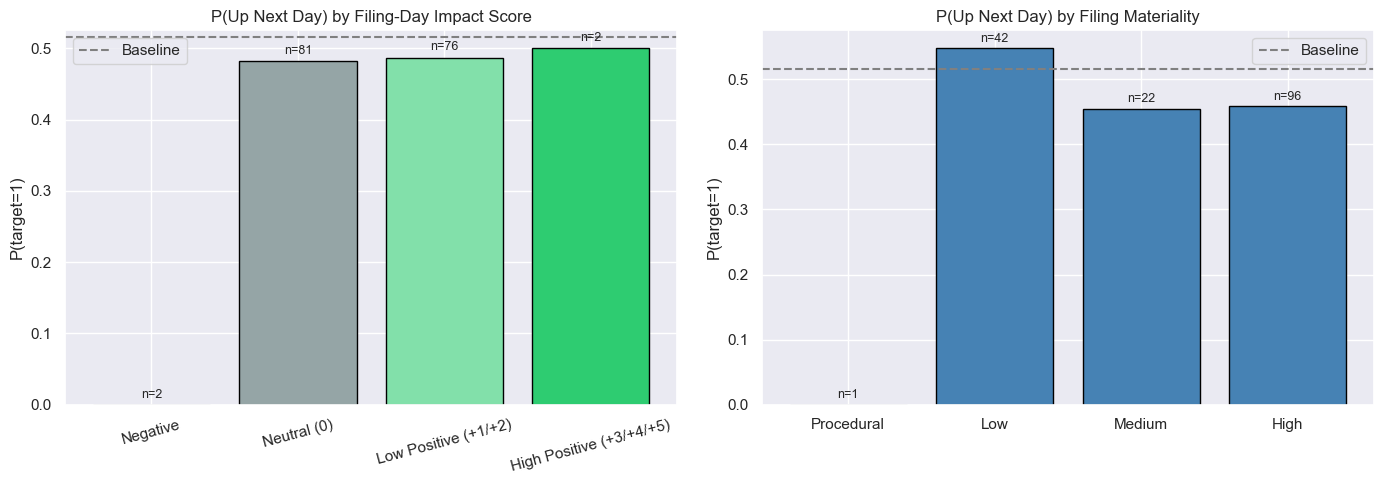

In [52]:
# SEC signal predictive power: P(Up) on filing days by impact score
MATERIALITY_MAP = {'procedural': 0, 'low': 1, 'medium': 2, 'high': 3}
sec_enc = sec.copy()
sec_enc['mat_ord'] = sec_enc['materiality'].map(MATERIALITY_MAP)

daily_sec = sec_enc.groupby('date').agg(
    avg_impact=('impact_score', 'mean'),
    max_materiality=('mat_ord', 'max'),
).rename_axis('Date')

merged = df_prices[['target']].join(daily_sec, how='inner')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# P(Up) by impact score bucket
merged['impact_bucket'] = pd.cut(merged['avg_impact'], bins=[-5.1, -0.5, 0.5, 2.5, 5.1],
                                  labels=['Negative', 'Neutral (0)', 'Low Positive (+1/+2)', 'High Positive (+3/+4/+5)'])
rates = merged.groupby('impact_bucket', observed=True)['target'].agg(['mean', 'count'])
color_map = {'Negative': '#e74c3c', 'Neutral (0)': '#95a5a6',
             'Low Positive (+1/+2)': '#82e0aa', 'High Positive (+3/+4/+5)': '#2ecc71'}
bars = axes[0].bar(rates.index.astype(str), rates['mean'],
                   color=[color_map.get(str(x), '#95a5a6') for x in rates.index], edgecolor='black')
for bar, count in zip(bars, rates['count']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'n={int(count)}', ha='center', fontsize=9)
axes[0].axhline(df_prices['target'].mean(), ls='--', color='gray', label='Baseline')
axes[0].set_title('P(Up Next Day) by Filing-Day Impact Score')
axes[0].set_ylabel('P(target=1)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=15)

# P(Up) by materiality
mat_labels = {0: 'Procedural', 1: 'Low', 2: 'Medium', 3: 'High'}
rates_mat = merged.groupby('max_materiality', observed=True)['target'].agg(['mean', 'count'])
bars = axes[1].bar([mat_labels.get(int(m), str(m)) for m in rates_mat.index],
                   rates_mat['mean'], color='steelblue', edgecolor='black')
for bar, count in zip(bars, rates_mat['count']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'n={int(count)}', ha='center', fontsize=9)
axes[1].axhline(df_prices['target'].mean(), ls='--', color='gray', label='Baseline')
axes[1].set_title('P(Up Next Day) by Filing Materiality')
axes[1].set_ylabel('P(target=1)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 11. Key Insights & Promising Signals

After exploring the data, here are the main takeaways:

### Target balance
- The target is roughly balanced (~50/50 up vs down), which is expected for daily stock returns. No severe class imbalance to handle.

### Technical indicators
- **RSI** near extremes (< 30 oversold, > 70 overbought) may carry a slight mean-reversion signal.
- **MACD histogram** sign changes could be useful — momentum shifts before direction changes.
- **Volatility** (20-day rolling std) and **ATR** capture regime changes; high-volatility periods behave differently.
- Moving average crossovers (SMA_5 vs SMA_20, EMA_12 vs EMA_26) are classic signals worth engineering.

### Tweet word scores (Elon's tweets)
- Log-odds differential word analysis on ALL 14.9k original tweets (not just Tesla-related) provides a much stronger signal than generic sentiment.
- **Bullish words** (calm/intellectual: "feel", "often", "details", "complex") → P(Up) ≈ 0.80 next day.
- **Bearish words** (political/crisis: "government", "fired", "dei", "bureaucracy") → P(Up) ≈ 0.42 next day.
- **Day+1 is the dominant horizon** — same-day signal is near zero, confirming overnight reaction dynamics.
- Return spread: +2.13% between bullish and bearish word score days.

### Google Trends (categorized)
- **Risk signals** (recall, crash, lawsuit) spike during negative events — potential contrarian/fear indicators.
- **Investor signals** (buy/sell stock, earnings) track active trading interest — useful around catalysts.
- **Product signals** (FSD, robotaxi, cybertruck) capture product launch hype cycles.
- Weekly granularity across 13 categorized terms provides much richer signal than generic "Tesla" searches.
- Week-over-week changes in category-level aggregates may be more predictive than raw levels.

### SEC filing signals
- 233 sections classified across 198 filings (176 8-K, 11 10-K, 11 DEF 14A), spanning 2016–2026.
- **Earnings** (2.02) and **Reg FD** (7.01) dominate 8-K events; shareholder letters carry the strongest positive signals.
- Impact scoring (-5 to +5) via Qwen 2.5 7B provides numeric granularity for market-impact assessment.
- Filing materiality levels (procedural/low/medium/high) add a useful dimension beyond raw impact scores.

### Next step: feature engineering
1. **Lagged returns** (1d, 2d, 5d) — autocorrelation in returns
2. **Moving average crossover signals** (golden cross / death cross)
3. **RSI zones** (oversold / neutral / overbought buckets)
4. **Volume surge** (today's volume vs 20-day average)
5. **Tweet word score features** (raw score, rolling averages, score × Tesla interaction)
6. **Day-of-week effects** (Monday effect, Friday effect)
7. **Distance from Bollinger Bands** (% distance from upper/lower)
8. **Google Trends category aggregates** (risk_total, investor_total, product_total) + WoW changes
9. **SEC impact features** (filing-day flag, days-since-filing decay, impact score)